# PAN Card OCR using PyTesseract

## Problem

* Extract information from the image of a [permanent account number card](https://en.wikipedia.org/wiki/Permanent_account_number) by OCR in proper format.  
* Information includes Name, Father's Name, Date of Birth, PAN

## Solution


## Initialisation

### Import

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract
import cv2
import re
from scipy.ndimage import rotate

### Regex to detect necessary text

In [2]:
r = re.compile("([A-Z]{5}[0-9]{4}[A-Z]{1})|([0-9]{2}/[0-9]{2}/[0-9]{4})")    

### Display image

Matplotlib interprets images in RGB format, but OpenCV uses BGR format

In [3]:
def disp_img(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

margin = 10
# x_margin, y_margin = 10, 10

### Read image

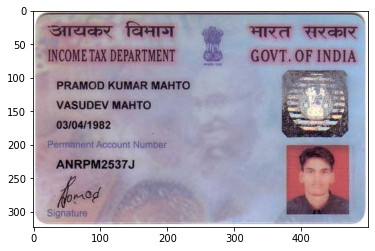

In [4]:
img = cv2.imread('dataset/PanTest_5.jpg') # BGR format
disp_img(img)

## Preprocessing

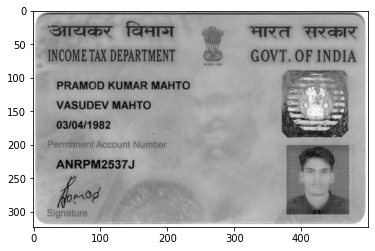

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
disp_img(img_gray)

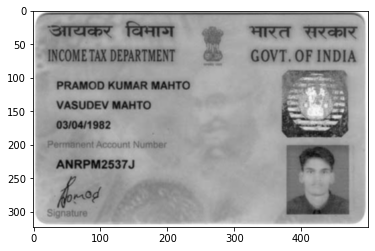

In [6]:
img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)
disp_img(img_blur)

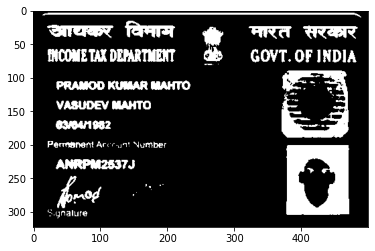

In [7]:
img_thresh = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
disp_img(img_thresh)

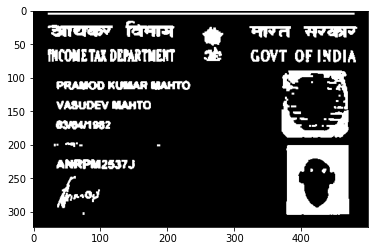

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
img_opening = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel, iterations=1)

disp_img(img_opening)

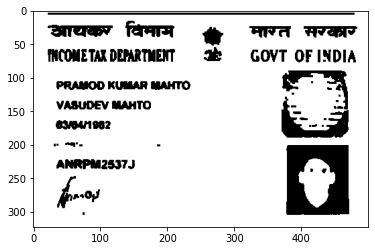

In [9]:
img_invert = 255 - img_opening
disp_img(img_invert)

## Text extraction

In [10]:
data = pytesseract.image_to_data(img_gray, output_type='dict')

print(data.keys())
print('Detected Text:', data['text'])

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
Detected Text: ['', '', '', '', ' ', '', '', '', 'sierex', 'feat', 'ARA', 'Ua', '', '', 'INCOMETAX', 'DEPARTMENT', '>', ' GOVT.OF', 'INDIA', '', 'PRAMOD', 'KUMAR', 'MAHTO,', '', 'VASUDEV', 'MAHTO', '', '', '', '03/04/1982', '', 'Permanent', 'Account', 'Number', '', '', '', 'ANRPM2537J', '', '', '', ' ', '', '', '', 'eaod', '', 'Signature']


In [11]:
bag = [(id, text) for id, text in enumerate(data['text']) if r.match(text)]
display(bag)

[(29, '03/04/1982'), (37, 'ANRPM2537J')]

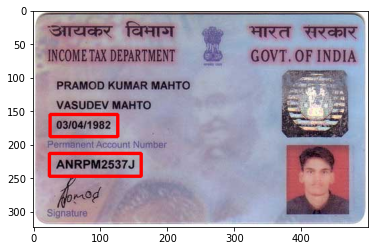

In [12]:
img_marked = img.copy()

for (id, text) in bag:
    left = data['left'][id] - margin
    top = data['top'][id] - margin
    width = data['width'][id] + 2*margin
    height = data['height'][id] + 2*margin
    cv2.rectangle(img_marked, (left, top), (left+width, top+height), (0, 0, 255), 4)

disp_img(img_marked)

References: [1](https://github.com/onkar-99/OCR-for-Pan-Card-Text-Recognition-using-Tesseract), [2](https://github.com/dilippuri/PAN-Card-OCR)